Welcome to aasignment 1.                                                       

We are using pathology images for our first assignment please download data from this link https://drive.google.com/drive/folders/10dUOzcPR-PQwfFYcHk5gsLjIjSorQ32Q?usp=sharing



# Task 1: Feature Generation (15%)
# Use and run the following code (a deep network) to generate features from a set of training images. For this assignment, you do not need to know how the deep network is working here to extract features.
# This code extracts the features of image T4.tif (in the T folder of dataset). Modify the code so that it iterates over all images of the dataset and extracts their features.
# Allocate 10% of the data for validation.

# Insert your code here for Task 1





In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import densenet121
from torch.autograd import Variable
from PIL import Image
import os

import numpy as np
import pandas as pd

# Load pre-trained DenseNet model
model = densenet121(pretrained=True)

# Remove the classification layer (last fully connected layer)
model = torch.nn.Sequential(*list(model.children())[:-1])

# Add a global average pooling layer
model.add_module('global_avg_pool', torch.nn.AdaptiveAvgPool2d(1))

# Set the model to evaluation mode
model.eval()

# Define the image preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

feature_vectors = []
feature_list= []
path = '/content/drive/MyDrive/SYDE 522/Assignments/A1/train' #Change to data path
for folder in os.listdir(path):
    full_folder_path = os.path.join(path, folder)
    print(full_folder_path)
    for image in os.listdir(full_folder_path):
        image_path = os.path.join(full_folder_path, image)  # Get the full path to the image
        print(image_path)
        # Load an image
        image = Image.open(image_path)

        # Preprocess the image
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

        # Wrap the input tensor in a Variable
        input_var = Variable(input_batch)

        # Forward pass through the model
        features = model(input_var)

        # Extract the feature tensor
        feature_vector = features.squeeze().detach().numpy().flatten() # [1024, 0]

        # adding label
        folder_label = np.array([folder])  # Convert folder name to numpy array
        feature_vector_with_label = np.concatenate((folder_label, feature_vector))

        feature_list.append(feature_vector_with_label)


feature_matrix = np.vstack(feature_list)
print("feature matrix list ", feature_matrix.shape)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O23.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O20.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O14.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O18.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O2.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O17.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O15.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O21.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O10.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O13.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O16.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O11.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O24.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O38.tif
/content/drive/MyDrive/SYDE 522/Assignments/A1/train/O/O26.tif
/

In [ ]:
# split data into train (90%), val (10%)
import sklearn
import random
from sklearn.model_selection import train_test_split
random.seed(42)

np.random.shuffle(feature_matrix)
num_samples = len(feature_matrix)
print(num_samples)
val_size = int(0.1 * num_samples)
train_size = int(0.9 * num_samples)


labels = feature_matrix[:, 0]
features = feature_matrix[:, 1:]

# Split the data into training, val, and test sets
X_train, X_val, y_train, y_val = train_test_split(
    features, labels, test_size=0.1, random_state=42
)
X_train = np.float64(X_train)
X_val = np.float64(X_val)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_validation:", X_val.shape)
print("Shape of y_validation:", y_val.shape)


780
Shape of X_train: (702, 1024)
Shape of y_train: (702,)
Shape of X_validation: (78, 1024)
Shape of y_validation: (78,)


# Task 2: High Bias kNN Classification Method (5%)
Choose a classification method and let it have a high bias.
Train it on the generated features and discuss why it is underfitting.
Insert your code here for Task 2

Notes:

*   Need a supervised algorithm since classification
*   Need an algorithm that tends to underfit
*   Options: Linear Regression, kNN








In [ ]:
# algo

In [ ]:
# k-fold cross validation

# Task 3: High Variance kNN Classification Method (5%)
# Use the chosen classification method and let it have a high variance.
# Train it on the generated features and discuss why it is overfitting.

# Insert your code here for Task 3




# Task 4: Balanced Classification Method (15%)
# Use the chosen classification method and let it balance the bias and variance.
# Train it on the generated features, possibly adjusting parameters.
# Discuss insights into achieving balance.

# Insert your code here for Task 4




# Task 5: K-Means Clustering (20%)
# Apply K-Means clustering on the generated features.
# Test with available labels and report accuracy.
# Experiment with automated K and compare with manually set 20 clusters.

# Insert your code here for Task 5




In [ ]:
# import modules
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [ ]:
# SSD and Elbow Plot
def SSD(features, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, random_state = 42, n_init='auto').fit(features)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize = (15, 15))
    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('K')
    plt.ylabel('SSD')
    plt.grid(True)
    plt.minorticks_on()
    plt.title('Elbow plot of k clusters')
    plt.show()

In [ ]:
# Silhouette Score
def silhouette(features, max_k):
  range_n_clusters = list(range(2, max_k+1))
  sil = []

  # calculate silhouette score for k clusters
  for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init=20).fit(features)
    sil.append(silhouette_score(np.float64(features), kmeans.labels_, metric = 'euclidean'))

  # find optimal k
  max_sil_score = max(sil)
  optimal_k = range_n_clusters[sil.index(max_sil_score)]

  # plot silhouette score for k clusters
  plt.plot(range_n_clusters, sil, 'bx-')
  plt.scatter(optimal_k, max_sil_score, color='red', s=50, label='Optimal k')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette score')
  plt.title('Silhouette Score For Optimal k')
  plt.grid(True)
  plt.legend()
  plt.show()

  return optimal_k

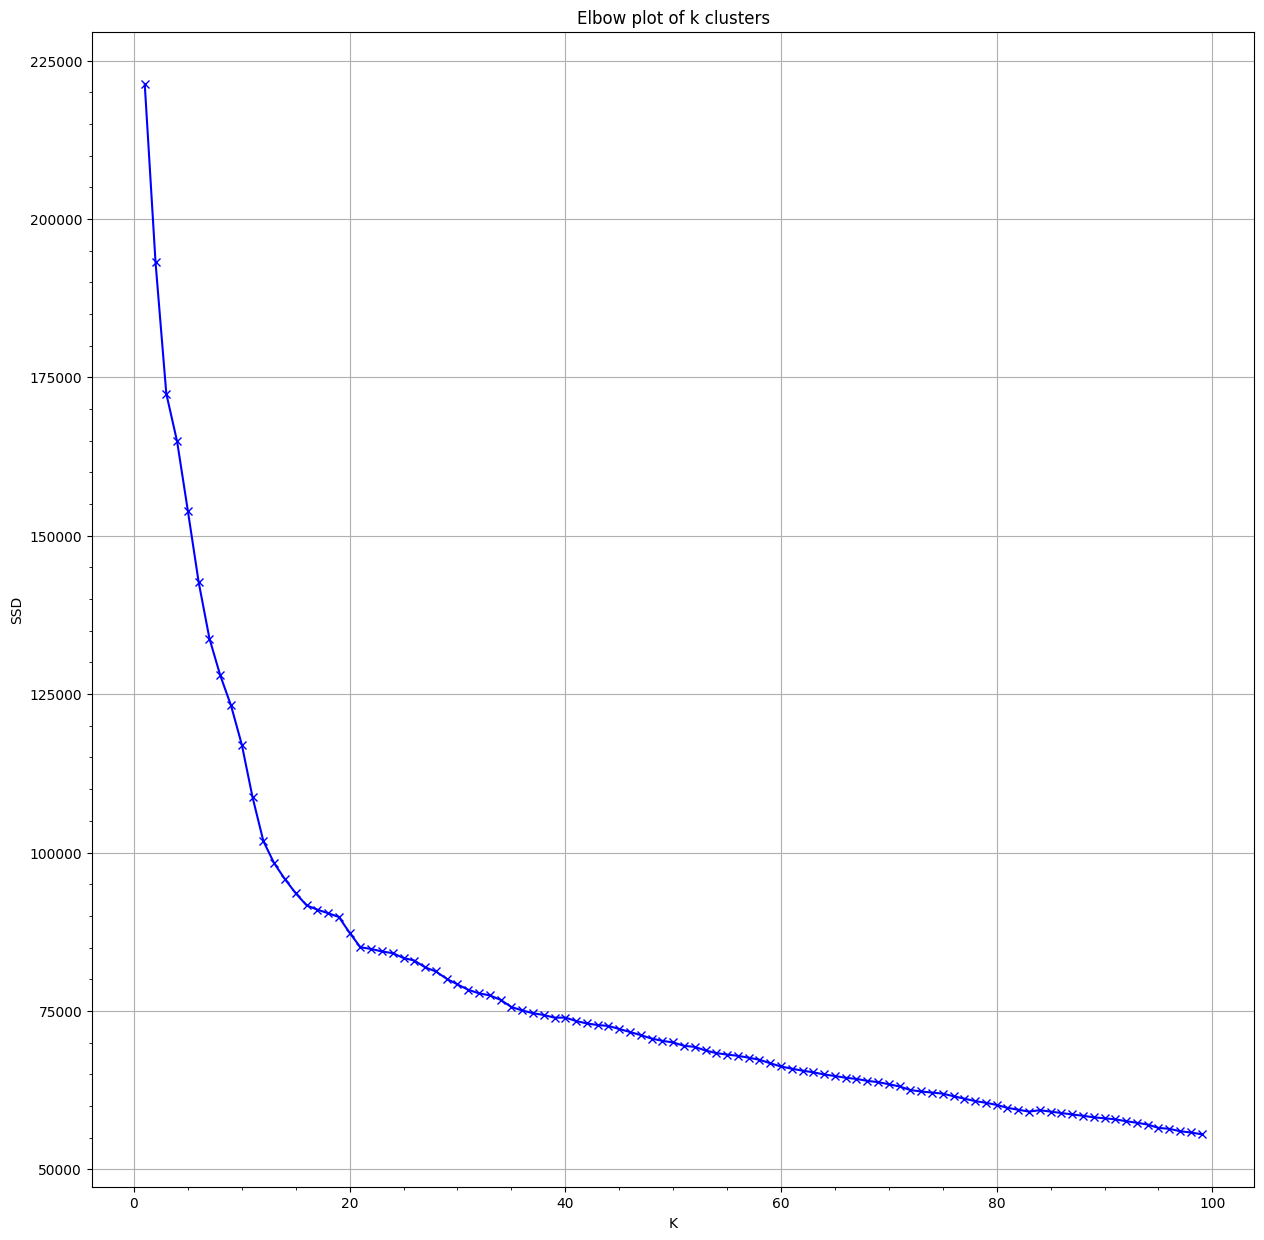

V-Measure Score for SSD: 80.09639558656838%


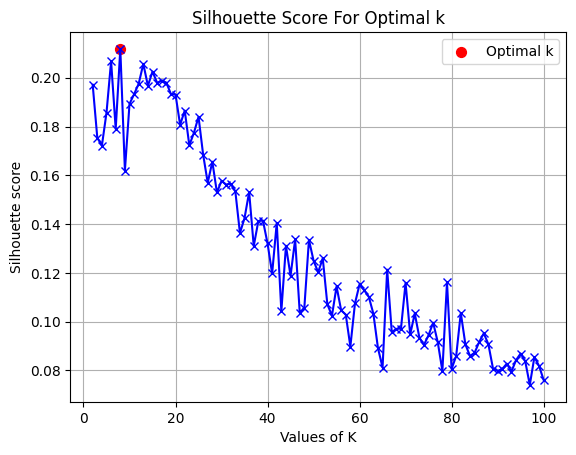

V-Measure Score for silhouette score: 72.86635466884817%
V-Measure Score for k=20: 88.55773470276608%


In [ ]:
# encode true labels
label_encoder = LabelEncoder()
encoded_labels_val = label_encoder.fit_transform(y_val)

# K means with optimal k from SSD
SSD(X_train, 100) # from the elbow plot, estimated to be k = 10
kmeans_SSD = KMeans(n_clusters = 10, random_state = 42, n_init=20)
kmeans_SSD.fit(X_train)
pred_SSD = kmeans_SSD.predict(X_val)

v_measure_SSD = v_measure_score(encoded_labels_val, pred_SSD)
print(f"V-Measure Score for SSD: {v_measure_SSD*100}%")

# K means with optimal k from silhouette score
kmeans_sil = KMeans(n_clusters = silhouette(X_train, 100), random_state = 42, n_init=20)
kmeans_sil.fit(X_train)
pred_sil = kmeans_sil.predict(X_val)

v_measure_sil = v_measure_score(encoded_labels_val, pred_sil)
print(f"V-Measure Score for silhouette score: {v_measure_sil*100}%")

# K means with k = 20
kmeans_k_20 = KMeans(n_clusters = 20, random_state = 42, n_init=20)
kmeans_k_20.fit(X_train)
pred_k_20 = kmeans_k_20.predict(X_val)

v_measure_k_20 = v_measure_score(encoded_labels_val, pred_k_20)
print(f"V-Measure Score for k=20: {v_measure_k_20*100}%")



# Task 6: Additional Clustering Algorithm (10%)
# Choose another clustering algorithm and apply it on the features.
# Test accuracy with available labels.

# Insert your code here for Task 6




In [ ]:
# modules
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from collections import Counter

In [ ]:
# DBSCAN - Density-Based Algorithm

# calculate \epsilon and minPts
# minPts = # of dimensions * 2
#        = 1024 * 2
#        = 2048
# set n_neighbors = minPts, but n_neighbours !> n_samples
# therefore, set n_neighbours to n_samples

def find_eps(features, minPts):
    nbrs = NearestNeighbors(n_neighbors = minPts).fit(np.float64(features))
    neigh_dist, neigh_ind = nbrs.kneighbors(np.float64(features))
    # sort the neighbor distances in ascending order
    sort_neigh_dist = np.sort(neigh_dist, axis = 0)
    sort_neigh_dist = sort_neigh_dist[:,1]

    # knee plot
    from kneed import KneeLocator
    kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = sort_neigh_dist, S = 1.0,
                        curve = "concave", direction = "increasing", online=True)
    kneedle.plot_knee()
    plt.show()

    print(kneedle.knee_y)

    return kneedle.knee_y


18.883818972800462


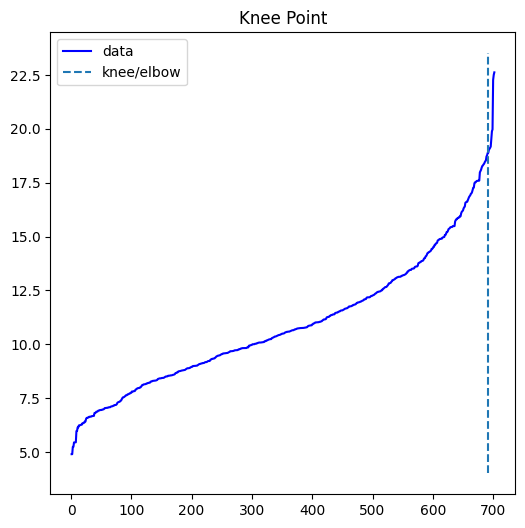

Counter({0: 653, 3: 29, 2: 6, 8: 2, 1: 1, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1})


In [ ]:
# fit DBSCAN
clusters = DBSCAN(eps =find_eps(X_train, 702), min_samples = 1).fit(np.float64(X_train))
clusters.labels_
set(clusters.labels_)
print(Counter(clusters.labels_))

19.946601355521327


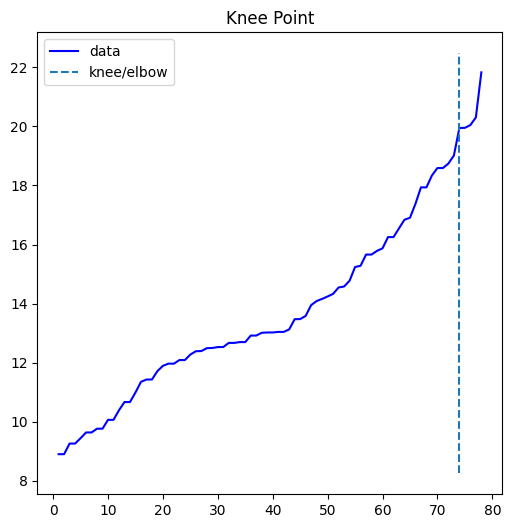

Counter({1: 56, 3: 6, 0: 3, 5: 3, 6: 3, 7: 3, 2: 1, 4: 1, 8: 1, 9: 1})
V-Measure Score for DBSCAN: 0.4973268041796002
Adjusted Rand Index: 0.06338272150651138


In [ ]:
# Calculate V-measure & Rand Indx score on val set
clusters = DBSCAN(find_eps(X_val, 78), min_samples = 1).fit(np.float64(X_val))
clusters.labels_
set(clusters.labels_)
print(Counter(clusters.labels_))

v_measure_DBSCAN = v_measure_score(encoded_labels_val, clusters.labels_)
print(f"V-Measure Score for DBSCAN: {v_measure_DBSCAN*100}%")

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_val, clusters.labels_)
print(f"Adjusted Rand Index: {ari}")

# Task 7: PCA for Classification Improvement (20%)
# Apply PCA on the features and then feed them to the best classification method in the above tasks.
# Assess if PCA improves outcomes and discuss the results.

# Insert your code here for Task 7




In [ ]:
def eigen_decompostion_PCA(X,k):
  n, m = X.shape # n = observations, m = dimensions
  Xc = X - np.mean(X, axis=0) # X at 0

  covMat = np.dot(Xc.T,Xc) / (n-1) #Covariance matrix from Xc

  eigen_values, eigen_vectors = np.linalg.eig(covMat) #Eigen decomposition of covariance matrix

  sorted = np.argsort(eigen_values)[::-1] # sort eigen vector by eigen values
  PC = eigen_vectors[:, sorted]

  PCk = PC[:,: min(k,m)] # first k eigenvector column as PCk

  Xk = np.dot(Xc, PCk) # Project X onto PCk for Xk

  return Xk, PCk


In [ ]:
def svd_PCA(X, k):
  n, m = X.shape # n = observations, m = dimensions
  Xc = X - np.mean(X, axis=0) # X at 0

  U, sigma, Vt = np.linalg.svd(Xc, full_matrices=False)

  Xk = np.dot(U, np.diag(sigma))[:,: min (k,m)]
  PCk = Vt.T[:,: min(k,m)]

  return Xk, PCk

# Apply PCA to features
X_train_pca, _ = svd_PCA(X_train, k=18)
X_val_pca, _ = svd_PCA(X_val, k=18)

# Perform KMeans clustering with PCA-transformed features
kmeans_pca = KMeans(n_clusters = 20, random_state = 42, n_init=20)
kmeans_pca.fit(X_train_pca)
pred_pca = kmeans_pca.predict(X_val_pca)


# Evaluate clustering performance
v_measure_pca = v_measure_score(encoded_labels_val, pred_pca)
print(f"V-Measure Score for KMeans with PCA: {v_measure_pca*100}%")


V-Measure Score for KMeans with PCA: 74.0527105153823%


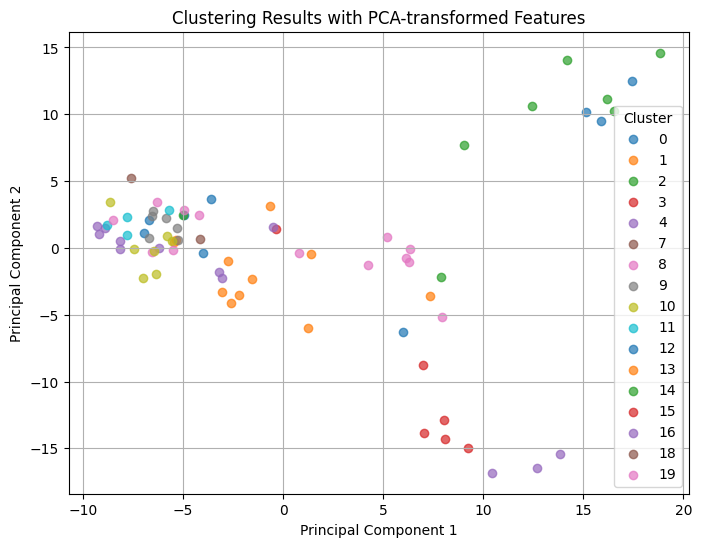

In [ ]:
# Plot clustering results in the reduced-dimensional space
plt.figure(figsize=(8, 6))
for label in np.unique(pred_pca):
    plt.scatter(X_val_pca[pred_pca == label, 0], X_val_pca[pred_pca == label, 1], label=label, alpha=0.7)
plt.title('Clustering Results with PCA-transformed Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Task 8: Visualization and Analysis (10%)
# Plot the features in a lower dimension using dimentinality reduction techniques.
# Analyze the visual representation, identifying patterns or insights.

# Insert your code here for Task 8

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


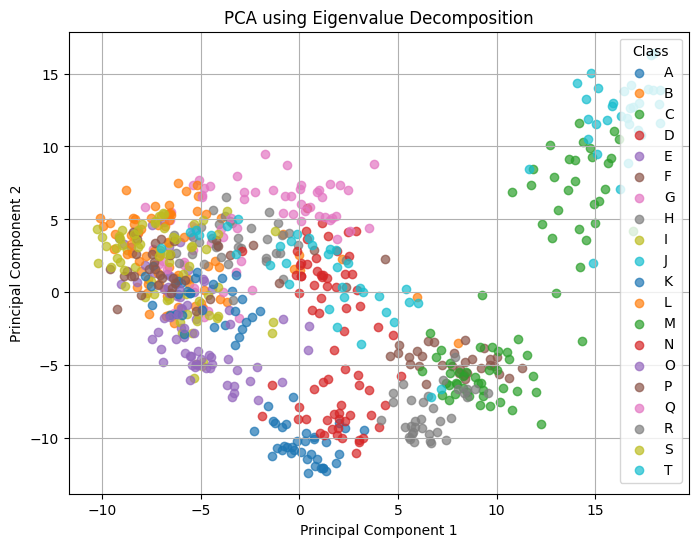

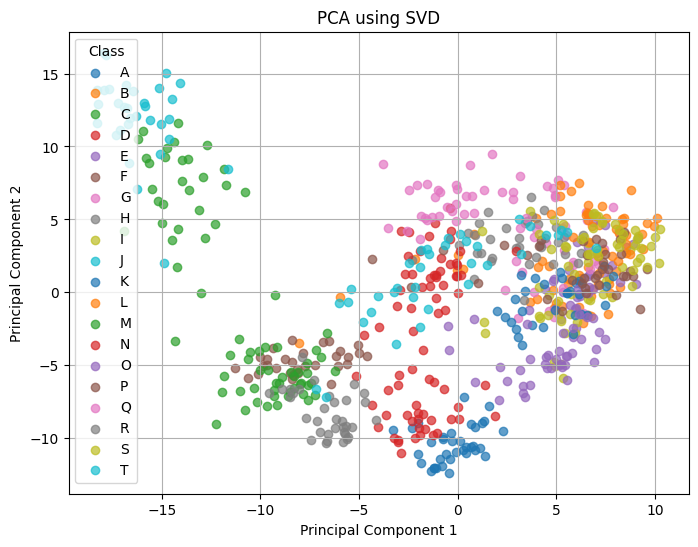

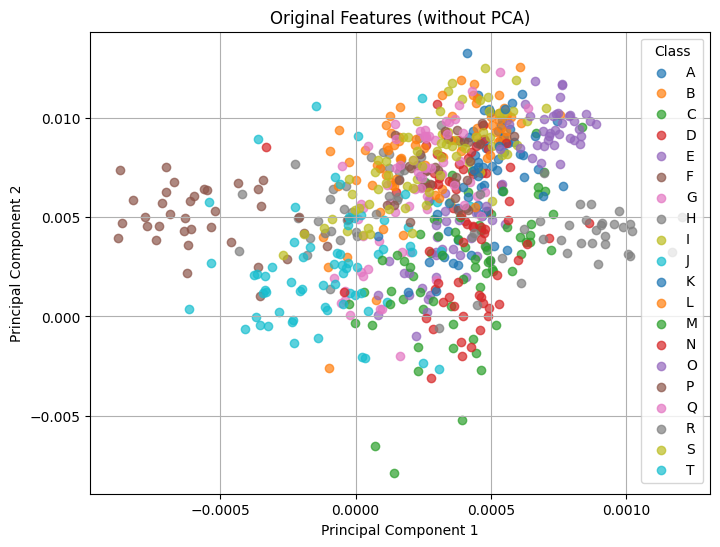

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot the features in lower dimension
def plot_features(X, y, title):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label, alpha=0.7)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

# Apply PCA using eigenvalue decomposition
X_train_pca_eig, _ = eigen_decompostion_PCA(X_train, k=18)
plot_features(X_train_pca_eig, y_train, 'PCA using Eigenvalue Decomposition')

# Apply PCA using SVD
X_train_pca_svd, _ = svd_PCA(X_train, k=18)
plot_features(X_train_pca_svd, y_train, 'PCA using SVD')

# Original Features (without PCA)
plot_features(X_train, y_train, 'Original Features (without PCA)')